## **Problem Statement**
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


## **Minimum Requirements**
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


## **Importing all the necessary python libraries :**

In [ ]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Preprocessing

In [ ]:
df = pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


*   **N_BEDROOM** --> 1 missing data
*   **N_BATHROOM** --> 5 missing data
*   **QS_OVERALL** --> 48 missing data

In [ ]:
df[df['N_BEDROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [ ]:
df_bed = df[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'INT_SQFT']]

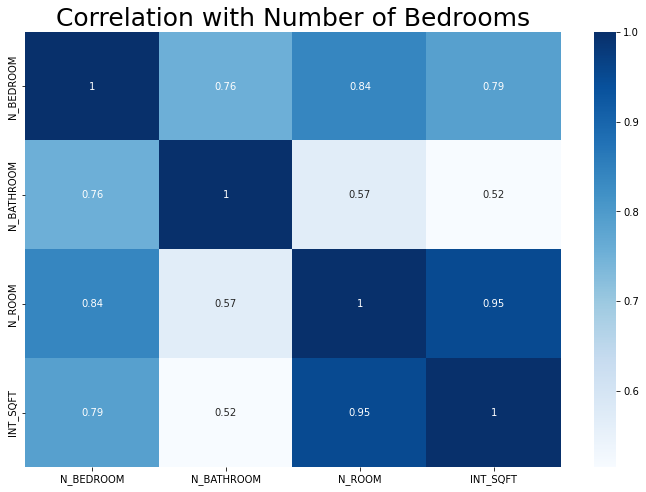

In [ ]:
plt.figure(figsize=(12,8));
sns.heatmap(df_bed.corr(),annot=True,cmap='Blues');
plt.title('Correlation with Number of Bedrooms',fontsize=25,fontweight=5);

We can see that Number of Bedrooms is highly correlated to Number of Rooms and Number of Bathrooms.

In [ ]:
df[(df['N_ROOM']==4) & (df['N_BATHROOM']==1) & (df['INT_SQFT']==1556)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
286,P06391,Velachery,1556,29-08-2009,105,2.0,1.0,4,Partial,No,...,NoSeWa,Paved,RL,4.6,2.4,4.4,3.550,289791,130873,9348100
1462,P00450,T Nagar,1556,05-04-2014,188,1.0,1.0,4,Normal Sale,Yes,...,NoSeWa,No Access,RM,5.0,4.5,2.6,3.795,415316,232088,12215170
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790
5820,P00140,Anna Nagar,1556,13-11-2014,120,1.0,1.0,4,AbNormal,No,...,AllPub,No Access,RM,4.2,2.8,4.6,4.010,731464,292586,18286600


I am filling the empty cell with 1.0 as the their is another house with the exact same AREA,INT_SQRT,N_BATHROOMS,N_ROOM.

In [ ]:
df.loc[4060,'N_BEDROOM'] = 1.0

In [ ]:
df['N_BEDROOM'].isnull().sum()

0

In [ ]:
df[df['N_BATHROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


Filtering based on AREA and N_ROOMS.

In [ ]:
df[(df['N_ROOM']==3) & (df['AREA']=='Chrompet')]['N_BATHROOM'].value_counts()

1.0    1128
Name: N_BATHROOM, dtype: int64

So all of the houses in Chrompet AREA and N_ROOM = 3 have single bathrooms

In [ ]:
df.loc[[5087,6134,6371],'N_BATHROOM'] = [1.0,1.0,1.0]

In [ ]:
df.loc[[5087,6134,6371],'N_BATHROOM']

5087    1.0
6134    1.0
6371    1.0
Name: N_BATHROOM, dtype: float64

In [ ]:
df[df['N_BATHROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [ ]:
df[(df['N_ROOM']==4) & (df['AREA']=='Anna Nagar')]['N_BATHROOM'].value_counts()

1.0    472
Name: N_BATHROOM, dtype: int64

In [ ]:
df[(df['N_ROOM']==5) & (df['AREA']=='Anna Nagar')]['N_BATHROOM'].value_counts()

1.0    309
Name: N_BATHROOM, dtype: int64

Same is the case for index = 70,6535

In [ ]:
df.loc[[70,6535],'N_BATHROOM'] = [1.0,1.0]

In [ ]:
df['N_BATHROOM'].isnull().sum()

0

So our N_BATHROOM feature is also cleaned.

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df[df['QS_OVERALL'].isnull()].head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,12-09-2009,148,3.0,2.0,5,Family,No,...,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,597135,188569,15714080
46,P09483,T Nagar,1882,18-11-2006,189,2.0,1.0,5,AbNormal,Yes,...,ELO,Gravel,RM,3.9,4.5,4.7,NaN,433393,272877,16051580
86,P00545,Chrompet,1085,19-01-2014,149,1.0,1.0,3,AbNormal,Yes,...,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,387815,100545,14363500
111,P06768,Adyar,1034,30-05-2009,73,1.0,1.0,3,AdjLand,Yes,...,ELO,Gravel,C,3.8,3.3,3.5,NaN,277702,46284,9256740
134,P00089,T Nagar,1942,20-12-2014,10,2.0,1.0,5,Family,No,...,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,320599,61654,12330740


In [ ]:
df_overall = df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

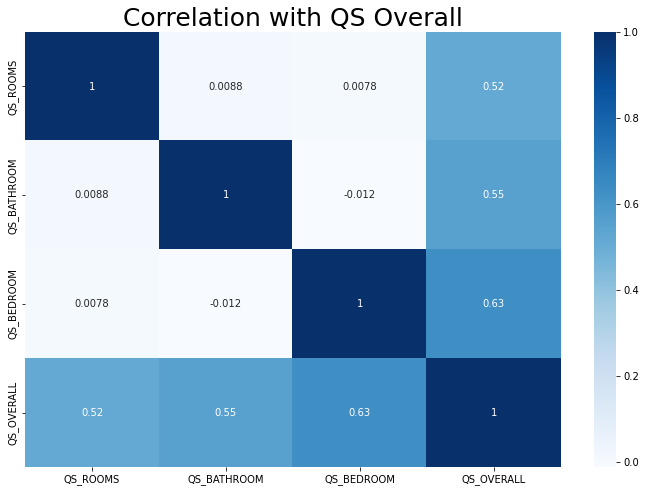

In [ ]:
plt.figure(figsize=(12,8));
sns.heatmap(df_overall.corr(),annot=True,cmap='Blues')
plt.title('Correlation with QS Overall',fontsize=25,fontweight=5);

In [ ]:
df_overall.loc[0,:]

QS_ROOMS       4.00
QS_BATHROOM    3.90
QS_BEDROOM     4.90
QS_OVERALL     4.33
Name: 0, dtype: float64

In [ ]:
(4.00+3.90+4.90)/3

4.266666666666667

Our Overall QS is almost equal to the average of QS_ROOMS,QS_BATHROOM,QS_BEDROOM which is what I will be using to fill the null values.

In [ ]:
indexes = df[df['QS_OVERALL'].isnull()].index

In [ ]:
indexes

Int64Index([  15,   46,   86,  111,  134,  143,  161,  186,  208,  248,  261,
             284,  312,  329,  355,  402,  437,  479,  513,  624,  625,  714,
             769,  822,  899,  955,  993, 1044, 1142, 1206, 1393, 1447, 1528,
            2196, 2227, 2228, 2336, 3870, 4329, 4836, 5104, 5458, 5463, 6111,
            6134, 6161, 6248, 6855],
           dtype='int64')

In [ ]:
for index in indexes:
    df.loc[index,'QS_OVERALL'] = (df.loc[index,'QS_ROOMS']+df.loc[index,'QS_BATHROOM']+df.loc[index,'QS_BEDROOM'])/3

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Our Missing Data is Filled but a lot of our columns are of object type. I will be encoding them to integer type but let's ensure that they are clean before encoding.

In [ ]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        509
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

So we have some similar form of names like Anna Nagar and Ann Nagar. Let's fix this!! Since we only have a few type of AREAS, I will be using the replace function. But the most appropriate way of doing this would be to use NLTK.

In [ ]:
df['AREA'] = df['AREA'].replace({'Ann Nagar':'Anna Nagar',
                    'Ana Nagar':'Anna Nagar',
                    'Karapakam':'Karapakkam',
                    'Velchery':'Velachery',
                    'Adyr':'Adyar',
                    'Chormpet':'Chrompet',
                    'Chrompt':'Chrompet',
                    'Chrmpet':'Chrompet',
                    'KKNagar':'KK Nagar',
                    'TNagar':'T Nagar'})

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df['SALE_COND'] = df['SALE_COND'].replace({'AbNormal':'Ab Normal',
                         'AdjLand':'Adj Land',
                         'Partiall':'Partial',
                         'PartiaLl':'Partial'})

In [ ]:
df['SALE_COND'].unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df['SALE_COND'] = df['SALE_COND'].replace({'AbNormal':'Ab Normal',
                         'AdjLand':'Adj Land',
                         'Partiall':'Partial',
                         'PartiaLl':'Partial'})

In [ ]:
df['SALE_COND'].unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'})

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'AllPub':'All Pub','NoSeWa':'NoSewr'})

Notice that NoSewr has a space in it. So let's fix that

In [ ]:
rem_spc = lambda a:a.strip()

In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].apply(rem_spc)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df['STREET'] = df['STREET'].replace({'NoAccess':'No Access',
                      'Pavd':'Paved'})

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Our Object type features are now cleaned. Let's perform some EDA now!!

## Exploratory Data Analysis

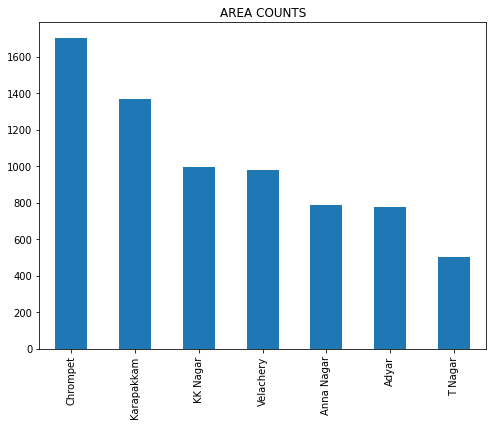

In [ ]:
plt.figure(figsize=(8,6));
df['AREA'].value_counts().plot(kind='bar');
plt.title('AREA COUNTS');

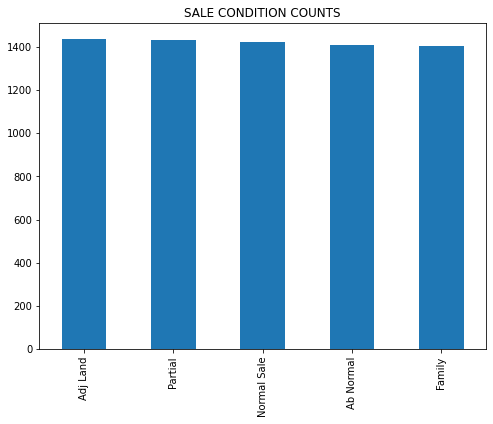

In [ ]:
plt.figure(figsize=(8,6));
df['SALE_COND'].value_counts().plot(kind='bar');
plt.title('SALE CONDITION COUNTS');

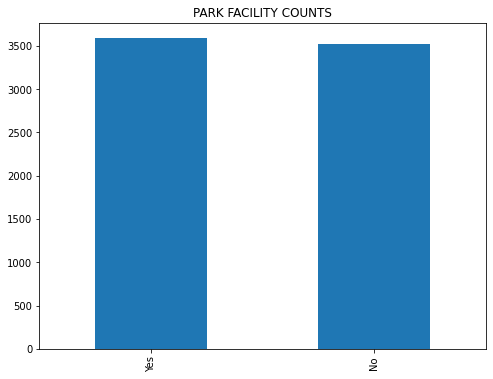

In [ ]:
plt.figure(figsize=(8,6));
df['PARK_FACIL'].value_counts().plot(kind='bar');
plt.title('PARK FACILITY COUNTS');

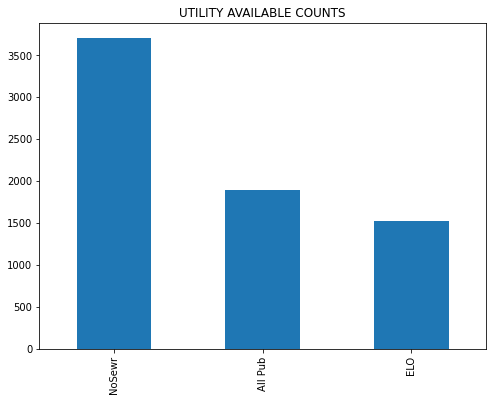

In [ ]:
plt.figure(figsize=(8,6));
df['UTILITY_AVAIL'].value_counts().plot(kind='bar');
plt.title('UTILITY AVAILABLE COUNTS');

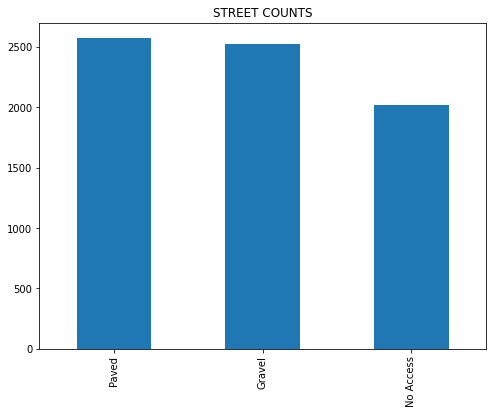

In [ ]:
plt.figure(figsize=(8,6));
df['STREET'].value_counts().plot(kind='bar');
plt.title('STREET COUNTS');

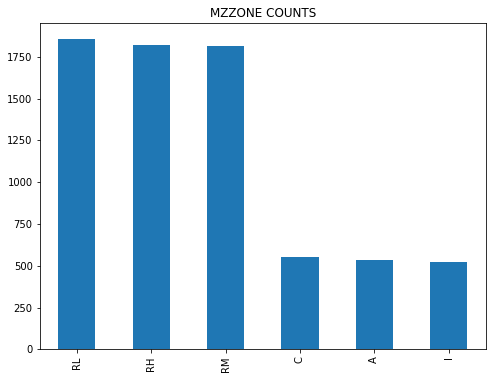

In [ ]:
plt.figure(figsize=(8,6));
df['MZZONE'].value_counts().plot(kind='bar');
plt.title('MZZONE COUNTS');

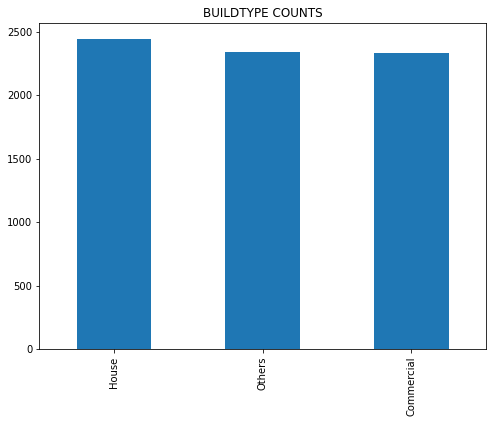

In [ ]:
plt.figure(figsize=(8,6));
df['BUILDTYPE'].value_counts().plot(kind='bar');
plt.title('BUILDTYPE COUNTS');

In [ ]:
encoder = LabelEncoder()

encoder.fit_transform(df['BUILDTYPE'])
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'Commercial': 0, 'House': 1, 'Others': 2}


In [ ]:
encoder = LabelEncoder()

df['AREA'] = encoder.fit_transform(df['AREA'])

df['SALE_COND'] = encoder.fit_transform(df['SALE_COND'])
df['PARK_FACIL'] = encoder.fit_transform(df['PARK_FACIL'])
df['UTILITY_AVAIL'] = encoder.fit_transform(df['UTILITY_AVAIL'])
df['STREET'] = encoder.fit_transform(df['STREET'])
df['MZZONE'] = encoder.fit_transform(df['MZZONE'])
df['BUILDTYPE'] = encoder.fit_transform(df['BUILDTYPE'])

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,4,1004,04-05-2011,131,1.0,1.0,3,0,1,...,0,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1,1986,19-12-2006,26,2.0,1.0,5,0,0,...,0,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,0,909,04-02-2012,70,1.0,1.0,3,0,1,...,1,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,6,1855,13-03-2010,14,3.0,2.0,5,2,0,...,2,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,4,1226,05-10-2009,84,1.0,1.0,3,0,1,...,0,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   int64  
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   int64  
 9   PARK_FACIL     7109 non-null   int64  
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   int64  
 12  UTILITY_AVAIL  7109 non-null   int64  
 13  STREET         7109 non-null   int64  
 14  MZZONE         7109 non-null   int64  
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df['DATE_SALE'].loc[1]

'19-12-2006'

In [ ]:
df['HOUSE_AGE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y') - pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')

In [ ]:
for index in df.index:
    df.loc[index,'HOUSE_AGE'] = df.loc[index,'HOUSE_AGE'].days



1.   Since **PRT_ID** is just indexing of houses, I will be dropping it
2.   the **DATE_SALE** and **DATE_BUILD** is useless to us since we just want a simple regression model and won't doing any time-series stuff and we already have used them for calculating AGE.
3.   Also The **QS features** are masked Data as described in the data description so I am dropping them too.
4.   Finally, The **Registration Fee** and **Commission** is determined by the **House Sale Price** so I am dropping them too as including them will be a form of data leakage!!





In [ ]:
df = df.drop(['PRT_ID','DATE_BUILD','DATE_SALE','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS'],axis=1)

In [ ]:
df['HOUSE_AGE'] = df['HOUSE_AGE'].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   int64  
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  HOUSE_AGE      7109 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 777.7 KB


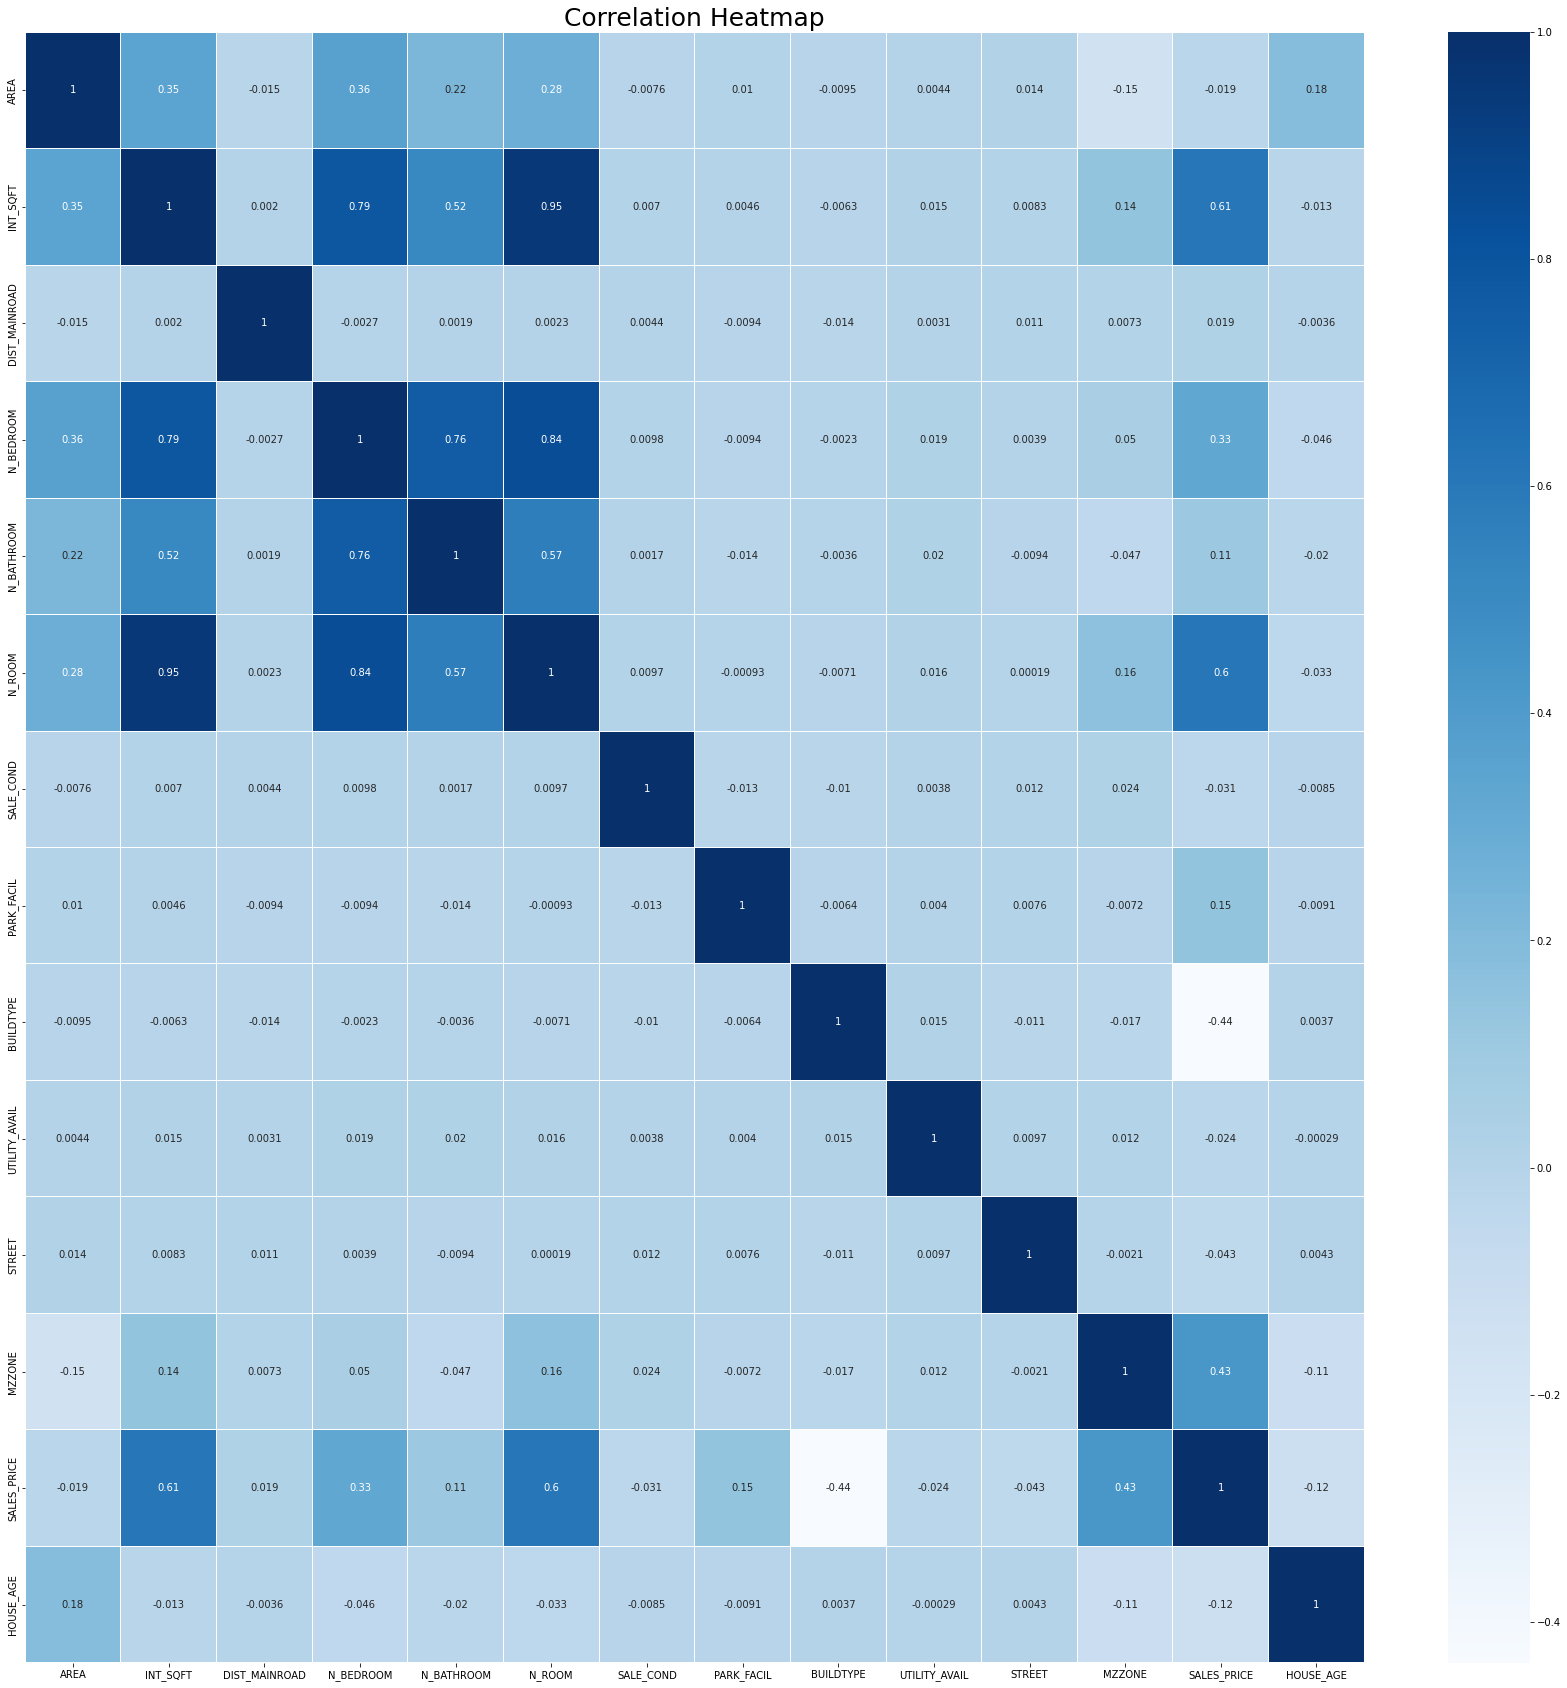

In [ ]:
plt.figure(figsize=(30,30));
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.01);
plt.title('Correlation Heatmap',fontsize=25,fontweight=5);

Our Sale Price is directly related to COMMISION,NUMBER OF ROOMS,SQFT AREA OF THE HOUSE and REGISTRATION FEE. Let's see this relation.

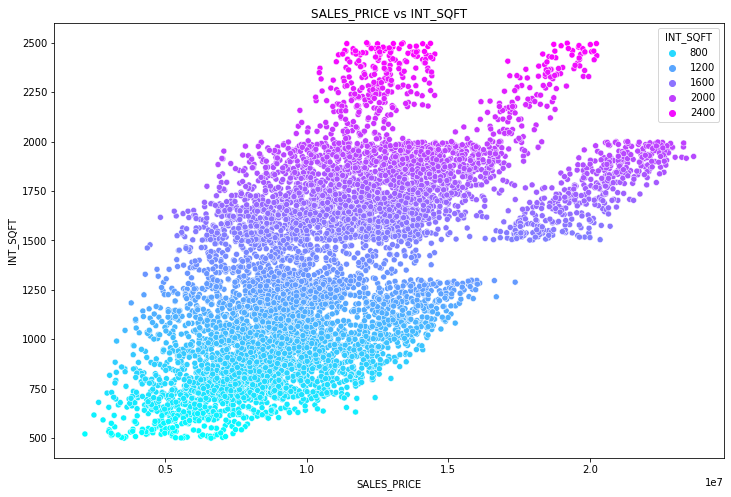

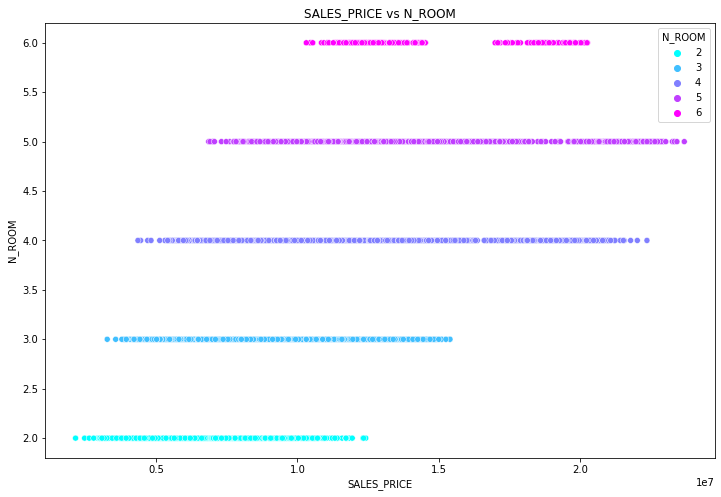

In [ ]:
for col in ['INT_SQFT','N_ROOM']:
    plt.figure(figsize=(12,8));
    sns.scatterplot(x='SALES_PRICE',y=col,data = df,hue=col,palette='cool');
    plt.title(f'SALES_PRICE vs {col}');
    plt.show();

## Standardization

In [ ]:
X = df.drop(['SALES_PRICE'],axis=1)
y= df['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [ ]:
scaled_x_train.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
0,0.565017,-0.258578,0.145324,-0.791911,-0.524325,-0.678010,0.709006,-0.995589,1.229357,0.890650,-1.190139,1.120115,-0.918127
1,-1.058890,0.777727,1.749721,-0.791911,-0.524325,0.303025,1.419296,-0.995589,1.229357,-1.456120,-1.190139,0.456580,-0.106710
2,0.565017,-0.405370,-0.848706,-0.791911,-0.524325,-0.678010,-0.001285,1.004431,-1.242771,-0.282735,-1.190139,-0.206955,0.948131
3,-1.058890,1.303548,1.627648,0.450772,-0.524325,1.284060,0.709006,1.004431,-0.006707,0.890650,1.177766,0.456580,0.461281
4,0.023715,0.258479,-1.459074,0.450772,-0.524325,0.303025,-0.001285,1.004431,1.229357,0.890650,1.177766,1.120115,-0.106710


In [ ]:
scaled_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [ ]:
scaled_x_test.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
0,0.023715,2.149243,0.703375,2.936139,1.907214,2.265095,-0.001285,-0.995589,-1.242771,-1.45612,1.177766,1.120115,-0.187852
1,0.565017,-0.567498,0.215080,-0.791911,-0.524325,-0.678010,-0.001285,-0.995589,-0.006707,0.89065,1.177766,1.120115,1.759547
2,-0.517588,-1.413193,-0.412728,-0.791911,-0.524325,-1.659045,-0.711575,1.004431,-0.006707,-1.45612,1.177766,-0.206955,0.623564
3,0.023715,2.260980,0.494106,2.936139,1.907214,2.265095,-0.001285,1.004431,1.229357,0.89065,-1.190139,0.456580,-1.161551
4,0.565017,-1.310220,1.278866,-0.791911,-0.524325,-1.659045,-0.711575,1.004431,1.229357,-1.45612,1.177766,-0.870490,-0.187852


## Model Training



## 1.   **Linear Regression**




In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(scaled_x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(scaled_x_test)

In [ ]:
lr_actual = y_test

In [ ]:
lr_r2 = r2_score(lr_actual, lr_pred)
print('R2 - Score for Linear Regression : ',lr_r2)

R2 - Score for Linear Regression :  0.7923044327628862


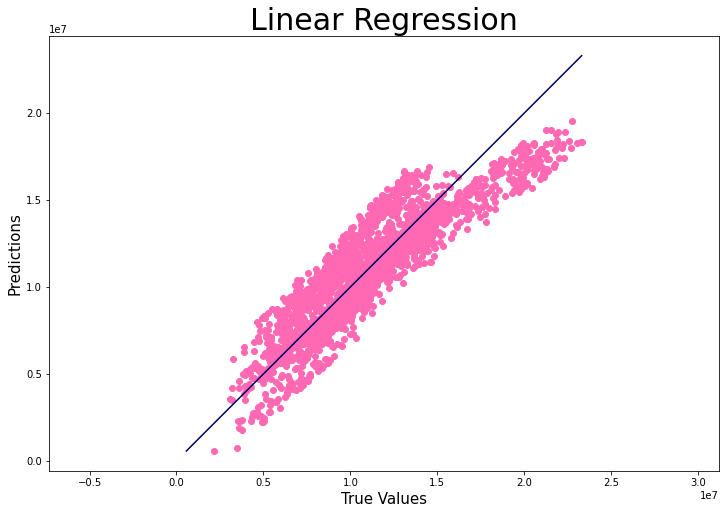

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(lr_actual, lr_pred, c='hotpink')
p1 = max(max(lr_pred), max(lr_actual))
p2 = min(min(lr_pred), min(lr_actual))
plt.plot([p1, p2], [p1, p2],'#000066')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Linear Regression",fontsize=30)
plt.axis('equal')
plt.show()

## 2. Decision Tree Regressor

In [ ]:
dr = DecisionTreeRegressor(random_state=1)
dr.fit(scaled_x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
dr_pred = dr.predict(scaled_x_test)
dr_actual = y_test

In [ ]:
dr_r2 = r2_score(dr_actual, dr_pred)
print('R2 - Score for Decision Tree Regressor : ',dr_r2)

R2 - Score for Decision Tree Regressor :  0.9597616226120891


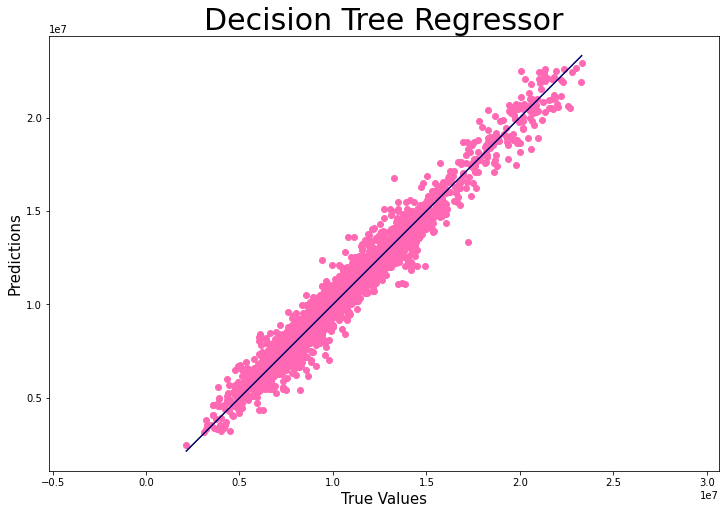

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(dr_actual, dr_pred, c='hotpink')
p1 = max(max(dr_pred), max(dr_actual))
p2 = min(min(dr_pred), min(dr_actual))
plt.plot([p1, p2], [p1, p2],'#000066')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Decision Tree Regressor",fontsize=30)
plt.axis('equal')
plt.show()

## 3. Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, verbose=4)
rf.fit(scaled_x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomForestRegressor(verbose=4)

In [ ]:
rf_pred = rf.predict(scaled_x_test)
rf_actual = y_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
rf_r2 = r2_score(rf_actual, rf_pred)
print('R2 - Score for Random Forest Regressor : ',rf_r2)

R2 - Score for Random Forest Regressor :  0.9832379302955802


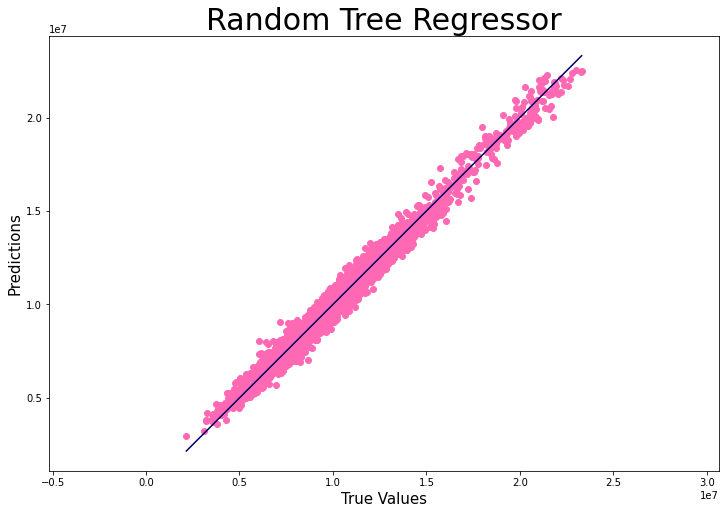

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(rf_actual, rf_pred, c='hotpink')
p1 = max(max(rf_pred), max(rf_actual))
p2 = min(min(rf_pred), min(rf_actual))
plt.plot([p1, p2], [p1, p2],'#000066')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Random Tree Regressor",fontsize=30)
plt.axis('equal')
plt.show()

## 4. XGBoost Regressor

In [ ]:
import xgboost as xgb

In [ ]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(scaled_x_train, y_train)

In [ ]:
model_pred = model.predict(scaled_x_test)
model_actual = y_test

In [ ]:
model_r2 = r2_score(model_actual, model_pred)
print('R2 - Score for XGBoost Regressor : ',model_r2)

R2 - Score for XGBoost Regressor :  0.9889507770294301


## Final Results

In [ ]:
print('R2 - Score for Linear Regression : ', lr_r2)
print('R2 - Score for Decision Tree Regressor : ', dr_r2)
print('R2 - Score for Random Forest Regressor : ', rf_r2)
print('R2 - Score for XGBoost Regressor : ', model_r2)

R2 - Score for Linear Regression :  0.7923044327628862
R2 - Score for Decision Tree Regressor :  0.9597616226120891
R2 - Score for Random Forest Regressor :  0.9832379302955802
R2 - Score for XGBoost Regressor :  0.9889507770294301


**XGBoost** turned out to be the best model with an accuracy of **98.89%**.